In [153]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

# Set style of plots
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})

pi2 = 2*np.pi

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


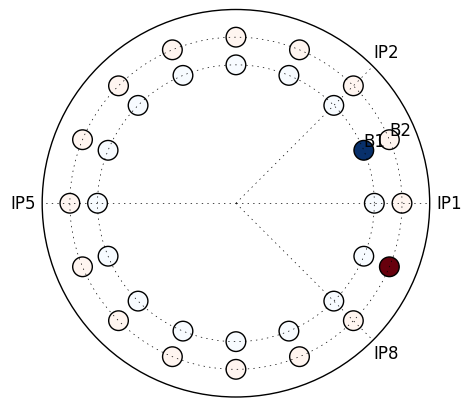

In [38]:
Slots = 16
ang = pi2*np.linspace(0,1,Slots,endpoint=False)
B1 = np.zeros(Slots)
B2 = np.zeros(Slots)
B1[0] = 1
B2[0] = 1
B1_r = 1
B2_r = 1.2

ang+=pi2/Slots

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.scatter(ang,np.ones_like(ang)*B1_r,c = B1,s=200,cmap='Blues')
ax.scatter(-ang,np.ones_like(ang)*B2_r,c = B2,s=200,cmap='Reds',vmin=0, vmax=1)
ax.set_xticks(np.pi*np.array([0,1/4,1,7/4]))  ;   ax.set_xticklabels(['IP1','IP2','IP5','IP8'])
ax.set_yticks([B1_r,B2_r])  ;  ax.set_yticklabels(['B1','B2'])

ax.set_rmax(1.4)
print(B1)

a 1.0 0.941858714747
(30, 20) (30, 20)
T 29 0
Ti 29 0


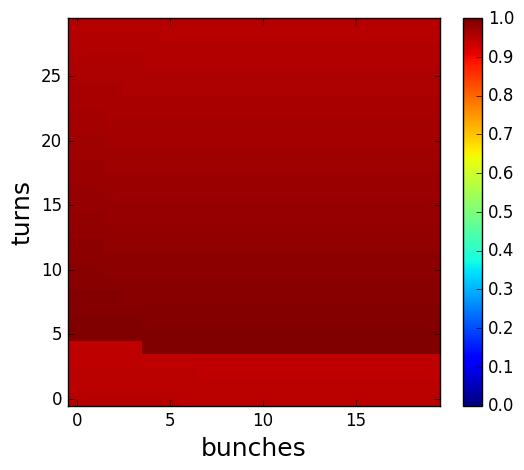

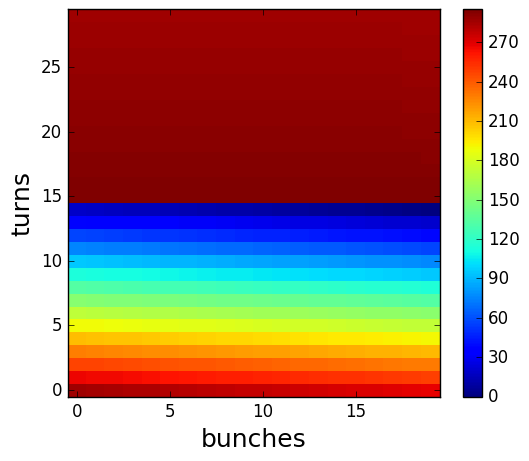

In [145]:
def pcolor_edges(x,y):
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    x = np.concatenate(([x[0]-dx],x))+dx*0.5
    y = np.concatenate(([y[0]-dy],y))+dy*0.5
    return np.meshgrid(x,y)
    

Nb = 20
Nt = 30
r=0.0001
b = np.arange(Nb)
t = np.arange(Nt)
B,T = np.meshgrid(b,t)
# a= np.zeros((Nb,Nt))
Bplot, Tplot = pcolor_edges(b,t)
ti = 4
bi = 4
# Ti = np.roll(T,shift = ti, axis=0)
Ti = -(Nt-T+ti)%Nt   
Bi = -(Nb-B+bi)%Nb
Ti[B<bi]-=1
Ti = Ti%Nt

a1= 1*np.exp(-(Ti*Nb+Bi)*r)

plt.figure()
plt.pcolormesh(Bplot,Tplot,a1,vmin = 0)
plt.xlim(np.min(Bplot),np.max(Bplot))
plt.ylim(np.min(Tplot),np.max(Tplot))
plt.xlabel('bunches')
plt.ylabel('turns')
plt.colorbar()
print('a',np.max(a1),np.min(a1))
print(a.shape, B.shape)
print('T',np.max(T),np.min(T))
print('Ti',np.max(Ti),np.min(Ti))


if 1:
    a[:]=0
    for i in range(0,15):
        ti = i%Nt
        for j in range(0,Nb):
            bi = j
            a[ti,bi] = 0
            Ti = -(Nt-T+ti)%Nt   
            Bi = -(Nb-B+bi)%Nb
            Ti[B<bi]-=1
            Ti = Ti%Nt
            a+= 1*np.exp(-(Ti*Nb+Bi)*r)


    plt.figure()
    plt.pcolormesh(Bplot,Tplot,a,vmin = 0)
    plt.xlim(np.min(Bplot),np.max(Bplot))
    plt.ylim(np.min(Tplot),np.max(Tplot))
    plt.xlabel('bunches')
    plt.ylabel('turns')
    plt.colorbar()


In [143]:
print(Bi)
print(Ti)

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18

In [80]:
off = 1
x = np.arange(10)
print((x-off))
print((x-off)%10)
print(-(off+10-x)%10)


[-1  0  1  2  3  4  5  6  7  8]
[9 0 1 2 3 4 5 6 7 8]
[9 0 1 2 3 4 5 6 7 8]


In [95]:
np.array(np.shape(T)) +[1,1]

array([31, 21])

In [99]:
x = np.concatenate((x,[1]))

# Parallisation

In [572]:
def status(tot_times, times, bool_trained,bool_turnbyturn):
    print('trained=',bool_trained, ', turnbyturn=',bool_turnbyturn)
    print('cpu times ',tot_times)
    print('wall times',np.max(times,axis=1))
    print('max CPU time = ',np.max(tot_times))
    print('max wall time =',np.max(times))

bool_trained = False
bool_turnbyturn = False
bool_annotate = False

nB = 10
nLR = 4
nTurns=4
nSteps = 1+nLR*2 + 2 + 1 + 1
tHO=0.1
tLR=0.05
tWake = nB*0.3
tKick = nB*0.3
tInd = 1

tlist = [0,tHO,tLR,tWake,tKick,tInd]
actList = [0,1,2,3,4,5]
pipeline= np.concatenate((np.ones(nLR)*2,[1],np.ones(nLR)*2,[3,4,5,0]),axis=0)
if nLR>0:
    pipeline_shift = np.concatenate((np.ones(nLR*2+1-2)*2,[1,0],[0,0,0,0]),axis=0)
else:
    pipeline_shift = np.zeros_like(pipeline)
print(pipeline)
B1 = np.arange(nB)
B2 = np.arange(nB)

actions = np.zeros((nB,nSteps*nTurns))
times = np.zeros((nB,nSteps*nTurns+2))
tot_times = np.zeros(nB)

step_tot=0
for turn in range(nTurns):
    if bool_turnbyturn:
        print(times[:,step_tot+1])
        times[:,step_tot+1] = np.max(times[:,step_tot+1])
        print(times[:,step_tot+1])
    for b in range(nB):
        cnt = -nLR
        for step in range(nSteps):
            step_tot = nSteps*turn+step
            actions[b,step_tot] = pipeline[step]

            shift = pipeline_shift[step]
            if int(actions[b,step_tot])==2:
                if (b+cnt<0 or b+cnt>=nB-1) and bool_trained :
#                     print(b+cnt)
                    actions[b,step_tot]=0
                cnt += 1
            if actions[b,step_tot]==4 and turn>0:
                shift = -nSteps
#             if b ==0 and turn ==0:
#                 if step_tot ==0:
#                     times[b,step_tot]=0
#                 else:
#                     times[b,step_tot] = times[b,step_tot-1] + action_time 
#             else:

    
            if step_tot == 0:
                times[b,step_tot] = times[b-1,step_tot+shift]
            else:
                times[b,step_tot] = np.max([times[b-1,step_tot+shift], \
                                            times[b,step_tot]])
            
            
            
            action_time = tlist[int(actions[b,step_tot])]    
            tot_times[b] += action_time
            
            times[b,step_tot+1] = times[b,step_tot] + action_time
            
            
if 0:
    print(times)
    print(actions)

status(tot_times, times, bool_trained,bool_turnbyturn)

[ 2.  2.  2.  2.  1.  2.  2.  2.  2.  3.  4.  5.  0.]
trained= False , turnbyturn= False
cpu times  [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30.]
wall times [ 30.    30.15  30.3   30.45  30.6   30.75  30.9   31.05  31.2   31.35]
max CPU time =  30.0
max wall time = 31.35


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:66: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:68: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


trained= False , turnbyturn= False
cpu times  [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30.]
wall times [ 30.    30.15  30.3   30.45  30.6   30.75  30.9   31.05  31.2   31.35]
max CPU time =  30.0
max wall time = 31.35


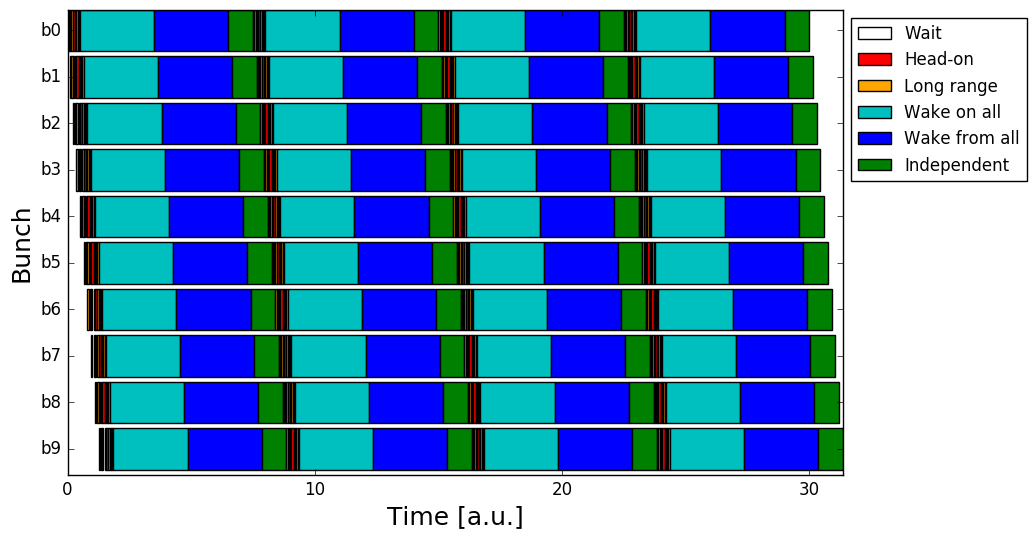

In [573]:
mpl_fig = plt.figure(figsize=(10,6))
ax = mpl_fig.add_subplot(111)

ind = np.arange(nB)    # the x locations for the groups
height = 0.9       # the width of the bars: can also be len(x) sequence

cols = ['w','r','orange','c','b','g']
for i in actList:
    ax.barh(0,0,0,color=cols[i],left =0,label=['Wait','Head-on','Long range',\
                                               'Wake on all','Wake from all','Independent'][i])
for b in range(nB):
    for turn in range(nTurns):
        cnt = -nLR
        for step in range(nSteps):
            step_tot = turn*nSteps + step
#             if np.all(int(actions[b,step])!=np.array([1,2])) or not(bool_trained and (b+cnt<0 or b+cnt>nB)):
            if actions[b,step_tot]>0:
                ax.barh(b,tlist[int(actions[b,step_tot])],height, \
                        color=cols[int(actions[b,step_tot])],left =times[b,step_tot])

                if np.any(int(actions[b,step])==np.array([1,2])) and bool_annotate :
                    ax.annotate(b+cnt,xy = (times[b,step_tot]+0.5*tlist[int(actions[b,step_tot])],b+height*0.5),ha='center')
            if np.any(int(pipeline[step])==np.array([1,2])):
                cnt+=1
# p1 = ax.barh(ind,menMeans,   height, color=(0.2588,0.4433,1.0))
# p2 = ax.barh(ind,womenMeans,  height, color=(1.0,0.5,0.62),left=menMeans)
ax.set_ylabel('Bunch')
ax.set_xlabel('Time [a.u.]')
# ax.set_title('Scores by group and gender')

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_yticks(ind + height/2.)
ax.set_yticklabels(('b'+str(i) for i in ind))#('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_xticks(np.arange(0, 81, 10))
ax.set_xlim(0,np.max(times))
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
# ax.grid(True)



status(tot_times, times, bool_trained,bool_turnbyturn)

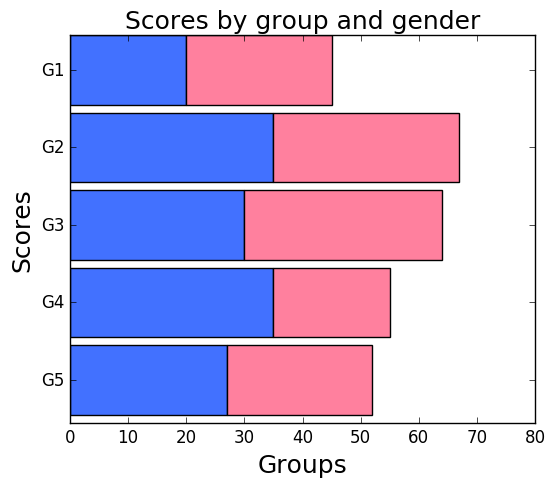

In [541]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
height = 0.9       # the width of the bars: can also be len(x) sequence

p1 = ax.barh(ind,menMeans,   height, color=(0.2588,0.4433,1.0))
p2 = ax.barh(ind,womenMeans,  height, color=(1.0,0.5,0.62),left=menMeans)
ax.set_ylabel('Scores')
ax.set_xlabel('Groups')
ax.set_title('Scores by group and gender')

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_yticks(ind + height/2.)
ax.set_xticks(np.arange(0, 81, 10))
ax.set_yticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))